In [1]:
import selenium 
import pandas as pd
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import os
import urllib
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait       
from selenium.webdriver.common.by import By       
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert
import time
from selenium.webdriver.common.keys import Keys
import warnings
warnings.filterwarnings("ignore")

In [2]:
drivers= webdriver.Chrome(r"C://chromedriver.exe")

In [5]:
drivers.get("https://www.cardekho.com/")
drivers.find_elements_by_xpath('//span[@class="used-cars-india"]')[0].click()

In [11]:
City_URL = []
City_url=drivers.find_elements_by_xpath('//li[@class="gsc_col-xs-4 gsc_col-sm-3 gsc_col-md-2"]/a')
for i in City_url:
    City_URL.append(i.get_attribute('href'))    

In [12]:
City_URL

['https://www.cardekho.com/used-cars+in+ahmedabad',
 'https://www.cardekho.com/used-cars+in+bangalore',
 'https://www.cardekho.com/used-cars+in+chennai',
 'https://www.cardekho.com/used-cars+in+delhi-ncr',
 'https://www.cardekho.com/used-cars+in+gurgaon',
 'https://www.cardekho.com/used-cars+in+hyderabad',
 'https://www.cardekho.com/used-cars+in+jaipur',
 'https://www.cardekho.com/used-cars+in+kolkata',
 'https://www.cardekho.com/used-cars+in+mumbai',
 'https://www.cardekho.com/used-cars+in+new-delhi',
 'https://www.cardekho.com/used-cars+in+noida',
 'https://www.cardekho.com/used-cars+in+pune']

In [154]:
Brand_Name = []
Model = []
Varient = []
Manf_year = []
Driven_KM = []
Fuel = []
NoOwners = []
Transmission = []
Location = []
Price = []

In [165]:
#Car_url = []
for url in City_URL[6:]:
    drivers.get(url)
    time.sleep(2)
    value = 0
    for i in range(50):
        drivers.execute_script("scrollBy("+ str(value) +",+2000);")
        value += 2000 
        time.sleep(2)

    c_url=drivers.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
    for i in c_url:
        Car_url.append(i.get_attribute('href')) 
        
#Brand Name    
    try:
        brand=drivers.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
        for b in brand:
            Brand_Name.append(b.text.split()[1])
              
    except NoSuchElementException as e:
        Brand_Name.append("-")
        
#Model                                            
    try:
        model=drivers.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
        for b in model:
            Model.append(b.text.strip()[5:])
        
    except NoSuchElementException as e:
        Model.append("-")
#Varient                                            
    try:
        varient=drivers.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/div[1]')
        for b in varient:
            Varient.append(b.text)  
        
    except NoSuchElementException as e:
        Varient.append("-")
#Manf_year
    try:
        year=drivers.find_elements_by_xpath('//div[@class="gsc_col-xs-7 carsName"]/a')
        for b in year:
            Manf_year.append(b.text.split()[0])
        
    except NoSuchElementException as e:
        Manf_year.append("-")
#Driven_KM
    try:
        km=drivers.find_elements_by_xpath('//div[@class="truncate dotlist"]/span[1]')
        for b in km:
            Driven_KM.append(b.text.split()[0].replace(',', ''))
        
    except NoSuchElementException as e:
        Driven_KM.append("-")
#Fuel
    try:
        fuel=drivers.find_elements_by_xpath('//div[@class="truncate dotlist"]/span[2]')
        for b in fuel:
            Fuel.append(b.text)
        
    except NoSuchElementException as e:
        Fuel.append("-")
        
#Transmission
    try:
        trans=drivers.find_elements_by_xpath('//div[@class="truncate dotlist"]/span[3]')
        for b in trans:
            Transmission.append(b.text)
        
    except NoSuchElementException as e:
        Transmission.append("-")
        
        
#Price
    try:
        price=drivers.find_elements_by_xpath('//span[@class="amnt "]')
        for b in price:
            Price.append(b.text.replace(',', ''))
        
    except NoSuchElementException as e:
        Price.append("-")
        

In [166]:
len(Car_url)

9169

In [167]:
len(Transmission)

9169

In [190]:
#NoOwners = []
#Location = []
for i in Car_url[5093:]:
    drivers.get(i)
    time.sleep(2)
    
#NoOwners
    try:
        owner=drivers.find_element_by_xpath('//li[6][@class="gsc_col-xs-6 gsc_col-md-4"]/div/div[2]')
        NoOwners.append(owner.text)
    except NoSuchElementException as e:
        try:
            owner=drivers.find_element_by_xpath('//li[4][@class="gsc_col-xs-6"]/div/div')
            NoOwners.append(owner.text)
        except NoSuchElementException as f:
            NoOwners.append("-")
        
#Location
    try:
        loc=drivers.find_element_by_xpath('//li[7][@class="gsc_col-xs-6 gsc_col-md-4"]/div/div[2]')
        Location.append(loc.text[0:2])
    except NoSuchElementException as e:
        try: 
            loc=drivers.find_element_by_xpath('//li[8][@class="gsc_col-xs-6"]/div/div')
            Location.append(loc.text[0:2])  
        except NoSuchElementException as f:
            Location.append("-")

In [192]:
len(NoOwners)

9169

In [193]:
data= list(zip(Brand_Name,Model,Varient,Manf_year,Driven_KM,Fuel,NoOwners,Transmission,Location,Price))

In [194]:
df_car= pd.DataFrame(data,columns=["Brand_Name","Model","Varient","Manf_year","Driven_KM","Fuel","NoOwners","Transmission","Location","Price"])

In [195]:
df_car

Brand_Name               Model               Varient Manf_year Driven_KM  \
0        Maruti       Maruti Baleno                 Alpha      2017     49072   
1        Maruti  Maruti Swift Dzire               VXI 1.2      2019      9303   
2        Maruti         Maruti Eeco           5 Seater AC      2020     17116   
3        Maruti     Maruti S-Presso                   VXI      2019     24230   
4        Maruti         Maruti Eeco      5 Seater AC BSIV      2019     14161   
...         ...                 ...                   ...       ...       ...   
9164    Hyundai      Hyundai Accent             Executive      2011     85000   
9165    Hyundai   Hyundai Grand i10  1.2 Kappa Magna BSIV      2019      1171   
9166     Maruti      Maruti Wagon R             VXI BS IV      2017     50296   
9167     Maruti        Maruti Swift               VVT VXI      2017     30000   
9168       Tata           Tata Nano                    XT      2018     17600   

        Fuel      NoOwners Transmission Location      Price  
0     Petrol     1st Owner       Manual       GJ  6.32 Lakh  
1     Petrol     1st Owner       Manual       GJ  6.88 Lakh  
2     Petrol     1st Owner       Manual       GJ  4.74 Lakh  
3     Petrol     1st Owner       Manual       GJ  4.16 Lakh  
4     Petrol     1st Owner       Manual       GJ  4.49 Lakh  
...      ...           ...          ...      ...        ...  
9164  Petrol  Second Owner       Manual       N/     2 Lakh  
9165  Petrol     1st Owner       Manual       MH  5.97 Lakh  
9166  Petrol     1st Owner       Manual       MH  4.42 Lakh  
9167  Petrol   First Owner       Manual       MH   4.7 Lakh  
9168  Petrol   First Owner       Manual       N/  1.65 Lakh  

[9169 rows x 10 columns]

In [196]:
file_name = 'Cardata.xlsx'
df_car.to_excel(file_name)

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

import re
import nltk
import warnings
warnings.filterwarnings('ignore')
import string
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [383]:
df=pd.read_excel("Cardata.xlsx",reindex=True)
df.drop('Unnamed: 0',axis='columns', inplace=True)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9169 entries, 0 to 9168
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand_Name    9169 non-null   object 
 1   Model         9165 non-null   object 
 2   Varient       9169 non-null   object 
 3   Manf_year     9169 non-null   int64  
 4   Driven_KM     9169 non-null   int64  
 5   Fuel          9169 non-null   object 
 6   NoOwners      9169 non-null   object 
 7   Transmission  9169 non-null   object 
 8   Location      7574 non-null   object 
 9   Price         9169 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 716.5+ KB


In [299]:
df

Brand_Name        Model           Varient  Manf_year  Driven_KM    Fuel  \
0        Maruti       Baleno             Alpha       2017      49072  Petrol   
1        Maruti  Swift Dzire           VXI 1.2       2019       9303  Petrol   
2        Maruti         Eeco       5 Seater AC       2020      17116  Petrol   
3        Maruti     S-Presso               VXI       2019      24230  Petrol   
4        Maruti         Eeco      5 Seater AC        2019      14161  Petrol   
...         ...          ...               ...        ...        ...     ...   
9164    Hyundai       Accent         Executive       2011      85000  Petrol   
9165    Hyundai    Grand i10  1.2 Kappa Magna        2019       1171  Petrol   
9166     Maruti      Wagon R              VXI        2017      50296  Petrol   
9167     Maruti        Swift           VVT VXI       2017      30000  Petrol   
9168       Tata         Nano                XT       2018      17600  Petrol   

          NoOwners Transmission Location     Price  
0      First Owner       Manual       GJ  632000.0  
1      First Owner       Manual       GJ  688000.0  
2      First Owner       Manual       GJ  474000.0  
3      First Owner       Manual       GJ  416000.0  
4      First Owner       Manual       GJ  449000.0  
...            ...          ...      ...       ...  
9164  Second Owner       Manual      NaN  200000.0  
9165   First Owner       Manual       MH  597000.0  
9166   First Owner       Manual       MH  442000.0  
9167   First Owner       Manual       MH  470000.0  
9168   First Owner       Manual      NaN  165000.0  

[9169 rows x 10 columns]

In [204]:
df.Location.isna().sum()

1595

MH    1426
DL    1257
TN     719
WB     690
HR     664
RJ     618
GJ     610
KA     593
TS     402
UP     269
AP     223
HP      17
UK      13
CH      12
PB       9
DE       9
JH       6
OD       6
PY       4
DN       4
ML       4
MP       3
HE       2
AS       2
TA       2
KL       2
GU       1
MA       1
DD       1
OR       1
CG       1
JK       1
BR       1
MB       1
Name: Location, dtype: int64


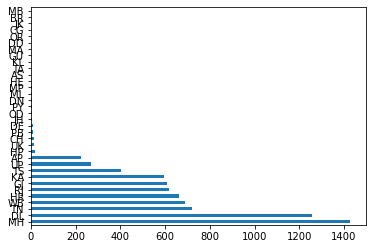

In [203]:
print(df['Location'].value_counts())
df["Location"].value_counts().plot(kind='barh')

In [300]:
df["Location"].fillna(method='ffill',inplace = True)

MH    1702
DL    1552
TN     856
WB     837
HR     830
GJ     744
RJ     726
KA     708
TS     490
UP     330
AP     271
HP      22
CH      15
UK      13
DE      10
PB      10
OD       7
JH       7
MP       5
ML       5
Name: Location, dtype: int64


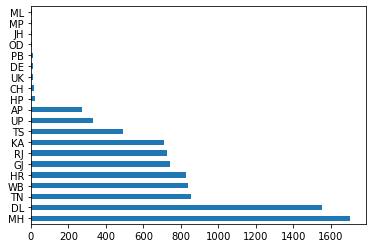

In [301]:
print(df['Location'].value_counts()[:20])
df["Location"].value_counts()[:20].plot(kind='barh')

In [302]:
#df.drop(df[df['Location'].value_counts() >= 10].index, inplace = True)

counts = df['Location'].value_counts()

df = df.loc[df['Location'].isin(counts.index[counts > 10])]

In [304]:
df.reset_index(inplace=True,drop=bool)

In [305]:
df

Brand_Name        Model           Varient  Manf_year  Driven_KM    Fuel  \
0        Maruti       Baleno             Alpha       2017      49072  Petrol   
1        Maruti  Swift Dzire           VXI 1.2       2019       9303  Petrol   
2        Maruti         Eeco       5 Seater AC       2020      17116  Petrol   
3        Maruti     S-Presso               VXI       2019      24230  Petrol   
4        Maruti         Eeco      5 Seater AC        2019      14161  Petrol   
...         ...          ...               ...        ...        ...     ...   
9091    Hyundai       Accent         Executive       2011      85000  Petrol   
9092    Hyundai    Grand i10  1.2 Kappa Magna        2019       1171  Petrol   
9093     Maruti      Wagon R              VXI        2017      50296  Petrol   
9094     Maruti        Swift           VVT VXI       2017      30000  Petrol   
9095       Tata         Nano                XT       2018      17600  Petrol   

          NoOwners Transmission Location     Price  
0      First Owner       Manual       GJ  632000.0  
1      First Owner       Manual       GJ  688000.0  
2      First Owner       Manual       GJ  474000.0  
3      First Owner       Manual       GJ  416000.0  
4      First Owner       Manual       GJ  449000.0  
...            ...          ...      ...       ...  
9091  Second Owner       Manual       MH  200000.0  
9092   First Owner       Manual       MH  597000.0  
9093   First Owner       Manual       MH  442000.0  
9094   First Owner       Manual       MH  470000.0  
9095   First Owner       Manual       MH  165000.0  

[9096 rows x 10 columns]

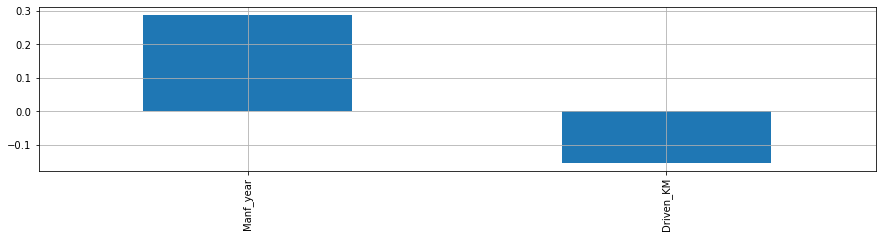

In [219]:
plt.figure(figsize=(15,3))
df.drop("Price",axis=1).corrwith(df["Price"]).plot(kind="bar",grid=True)
plt.xticks(rotation=90)
plt.show()

In [226]:
df_new = df.copy()

In [229]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096 entries, 0 to 9168
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand_Name    9096 non-null   object 
 1   Model         9092 non-null   object 
 2   Varient       9096 non-null   object 
 3   Manf_year     9096 non-null   int64  
 4   Driven_KM     9096 non-null   int64  
 5   Fuel          9096 non-null   object 
 6   NoOwners      9096 non-null   object 
 7   Transmission  9096 non-null   object 
 8   Location      9096 non-null   object 
 9   Price         9096 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 781.7+ KB


In [230]:
df_new['Brand_Name'] = df_new['Brand_Name'].astype(str)
df_new['Model'] = df_new['Model'].astype(str)
df_new['Varient'] = df_new['Varient'].astype(str)
df_new['Fuel'] = df_new['Fuel'].astype(str)
df_new['NoOwners'] = df_new['NoOwners'].astype(str)
df_new['Transmission'] = df_new['Transmission'].astype(str)
df_new['Location'] = df_new['Location'].astype(str)

In [231]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new[["Brand_Name","Model","Varient","Fuel","NoOwners","Transmission","Location"]] = df_new[["Brand_Name","Model","Varient","Fuel","NoOwners","Transmission","Location"]].apply(le.fit_transform)

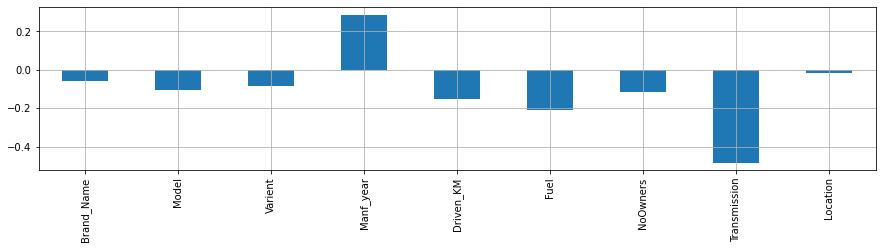

In [232]:
plt.figure(figsize=(15,3))
df_new.drop("Price",axis=1).corrwith(df_new["Price"]).plot(kind="bar",grid=True)
plt.xticks(rotation=90)
plt.show()

In [233]:
df_new

Brand_Name  Model  Varient  Manf_year  Driven_KM  Fuel  NoOwners  \
0             20     30      809       2017      49072     4         1   
1             20    211     1653       2019       9303     4         1   
2             20     72      720       2020      17116     4         1   
3             20    185     1649       2019      24230     4         1   
4             20     72      721       2019      14161     4         1   
...          ...    ...      ...        ...        ...   ...       ...   
9164          11     16     1090       2011      85000     4         3   
9165          11    102       81       2019       1171     4         1   
9166          20    235     1650       2017      50296     4         1   
9167          20    210     1628       2017      30000     4         1   
9168          30    147     1737       2018      17600     4         1   

      Transmission  Location     Price  
0                1         3  632000.0  
1                1         3  688000.0  
2                1         3  474000.0  
3                1         3  416000.0  
4                1         3  449000.0  
...            ...       ...       ...  
9164             1         7  200000.0  
9165             1         7  597000.0  
9166             1         7  442000.0  
9167             1         7  470000.0  
9168             1         7  165000.0  

[9096 rows x 10 columns]

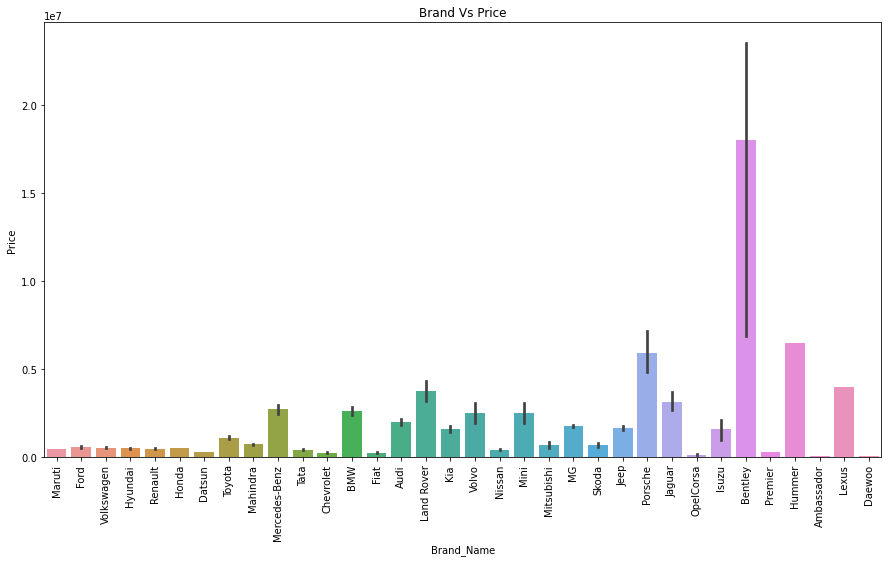

In [392]:
plt.figure(figsize=(15,8))
sns.barplot(x='Brand_Name',y='Price',data=df1)
plt.title("Brand Vs Price")
plt.xticks(rotation = 90)
plt.show()

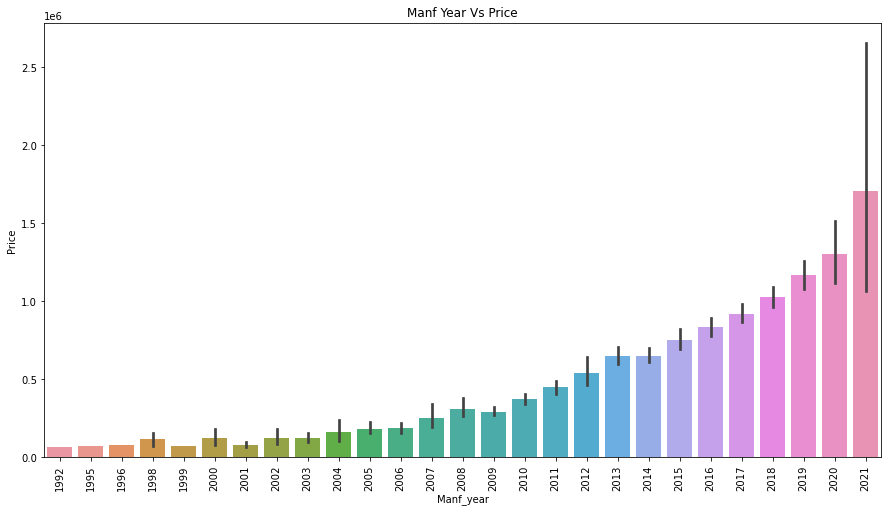

In [393]:
plt.figure(figsize=(15,8))
sns.barplot(x='Manf_year',y='Price',data=df1)
plt.title("Manf Year Vs Price")
plt.xticks(rotation = 90)
plt.show()

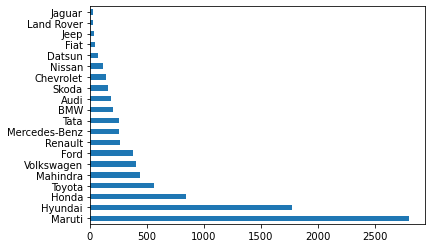

In [394]:
df["Brand_Name"].value_counts()[:20].plot(kind='barh')

Removal of outliers in data 

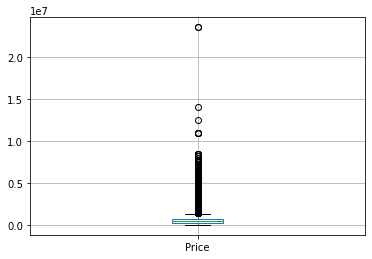

In [235]:
df.boxplot("Price")

In [306]:
q_hi  = df["Price"].quantile(0.9995)

df = df[(df["Price"] < q_hi)]

df.reset_index(inplace=True,drop=bool)

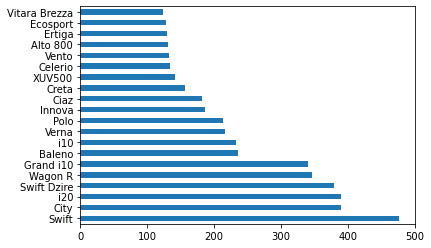

In [258]:
df['Model'].value_counts()
df["Model"].value_counts()[:20].plot(kind='barh')

In [307]:
df['NoOwners'].value_counts()

First Owner             6729
Second Owner            1938
Third Owner              345
Fourth & Above Owner      59
Test Drive Car            12
-                          5
Name: NoOwners, dtype: int64

In [308]:
df['NoOwners'].replace('-','NA',inplace=True)

In [263]:
df['Transmission'].value_counts()

Manual       7190
Automatic    1898
Name: Transmission, dtype: int64

VXI                        309
LXI                        186
VDI                        184
Sportz                     126
Magna                       95
                          ... 
Sportz AT 1.4                1
ZXI AMT 1.2                  1
Inscription D5               1
Ace Edition CVT Diesel       1
H2                           1
Name: Varient, Length: 1886, dtype: int64


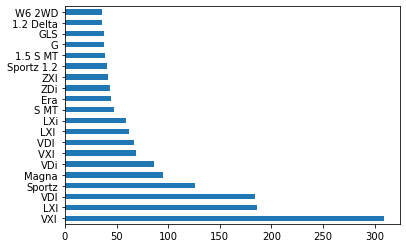

In [322]:
print(df['Varient'].value_counts())
df["Varient"].value_counts()[:20].plot(kind='barh')

In [318]:
df_new=df.copy()

In [319]:
df_new['Varient'] = df_new['Varient'].astype(str)

def text_clean_1(text):
    text = re.sub(r"^\s+|\s+$", "", text)    #Remove leading and trailing spaces 
    text = text.lower() 
    return text
cleaned1 = lambda x: text_clean_1(x)
df_new['Varient'] = pd.DataFrame(df_new.Varient.apply(cleaned1))

vxi                             447
vdi                             370
lxi                             343
sportz                          130
magna                            98
                               ... 
xt 4x4                            1
t10                               1
1.2 asta option with sunroof      1
ace edition cvt diesel            1
w6                                1
Name: Varient, Length: 1728, dtype: int64


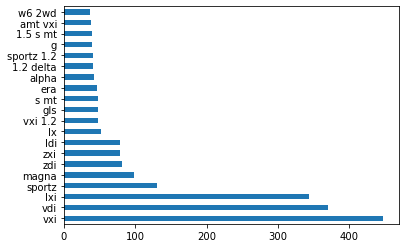

In [323]:
print(df_new['Varient'].value_counts())
df_new["Varient"].value_counts()[:20].plot(kind='barh')

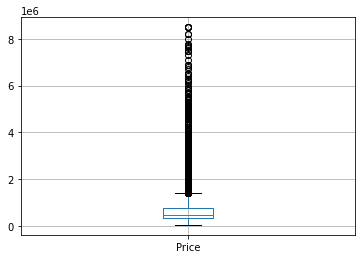

In [253]:
df.boxplot("Price")

In [309]:
df_final = pd.get_dummies(df, columns=['Location','Fuel','Model','Brand_Name'], prefix=['Loc','F','Model','Brand'])

In [313]:

df_final["NoOwners"].replace({"First Owner": 1, "Second Owner": 2,"Third Owner": 3,"Fourth & Above Owner":4,"Test Drive Car":5,"NA":6}, inplace=True)

df_final["Transmission"].replace({"Manual": 1, "Automatic": 2}, inplace=True)

In [314]:
df_final

Varient  Manf_year  Driven_KM  NoOwners  Transmission  \
0                Alpha       2017      49072         1             1   
1              VXI 1.2       2019       9303         1             1   
2          5 Seater AC       2020      17116         1             1   
3                  VXI       2019      24230         1             1   
4         5 Seater AC        2019      14161         1             1   
...                ...        ...        ...       ...           ...   
9083         Executive       2011      85000         2             1   
9084  1.2 Kappa Magna        2019       1171         1             1   
9085              VXI        2017      50296         1             1   
9086           VVT VXI       2017      30000         1             1   
9087                XT       2018      17600         1             1   

         Price  Loc_AP  Loc_CH  Loc_DL  Loc_GJ  ...  Brand_Nissan  \
0     632000.0       0       0       0       1  ...             0   
1     688000.0       0       0       0       1  ...             0   
2     474000.0       0       0       0       1  ...             0   
3     416000.0       0       0       0       1  ...             0   
4     449000.0       0       0       0       1  ...             0   
...        ...     ...     ...     ...     ...  ...           ...   
9083  200000.0       0       0       0       0  ...             0   
9084  597000.0       0       0       0       0  ...             0   
9085  442000.0       0       0       0       0  ...             0   
9086  470000.0       0       0       0       0  ...             0   
9087  165000.0       0       0       0       0  ...             0   

      Brand_OpelCorsa  Brand_Porsche  Brand_Premier  Brand_Renault  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
9083                0              0              0              0   
9084                0              0              0              0   
9085                0              0              0              0   
9086                0              0              0              0   
9087                0              0              0              0   

      Brand_Skoda  Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0               0           0             0                 0            0  
1               0           0             0                 0            0  
2               0           0             0                 0            0  
3               0           0             0                 0            0  
4               0           0             0                 0            0  
...           ...         ...           ...               ...          ...  
9083            0           0             0                 0            0  
9084            0           0             0                 0            0  
9085            0           0             0                 0            0  
9086            0           0             0                 0            0  
9087            0           1             0                 0            0  

[9088 rows x 322 columns]

In [324]:
df_final['Varient'] = df_final['Varient'].astype(str)
df_final['Varient'] = pd.DataFrame(df_final.Varient.apply(cleaned1))
df_final[["Varient"]] = df_final[["Varient"]].apply(le.fit_transform)

In [325]:
df_final

Varient  Manf_year  Driven_KM  NoOwners  Transmission     Price  Loc_AP  \
0         724       2017      49072         1             1  632000.0       0   
1        1586       2019       9303         1             1  688000.0       0   
2         670       2020      17116         1             1  474000.0       0   
3        1582       2019      24230         1             1  416000.0       0   
4         670       2019      14161         1             1  449000.0       0   
...       ...        ...        ...       ...           ...       ...     ...   
9083     1018       2011      85000         2             1  200000.0       0   
9084       73       2019       1171         1             1  597000.0       0   
9085     1582       2017      50296         1             1  442000.0       0   
9086     1563       2017      30000         1             1  470000.0       0   
9087     1669       2018      17600         1             1  165000.0       0   

      Loc_CH  Loc_DL  Loc_GJ  ...  Brand_Nissan  Brand_OpelCorsa  \
0          0       0       1  ...             0                0   
1          0       0       1  ...             0                0   
2          0       0       1  ...             0                0   
3          0       0       1  ...             0                0   
4          0       0       1  ...             0                0   
...      ...     ...     ...  ...           ...              ...   
9083       0       0       0  ...             0                0   
9084       0       0       0  ...             0                0   
9085       0       0       0  ...             0                0   
9086       0       0       0  ...             0                0   
9087       0       0       0  ...             0                0   

      Brand_Porsche  Brand_Premier  Brand_Renault  Brand_Skoda  Brand_Tata  \
0                 0              0              0            0           0   
1                 0              0              0            0           0   
2                 0              0              0            0           0   
3                 0              0              0            0           0   
4                 0              0              0            0           0   
...             ...            ...            ...          ...         ...   
9083              0              0              0            0           0   
9084              0              0              0            0           0   
9085              0              0              0            0           0   
9086              0              0              0            0           0   
9087              0              0              0            0           1   

      Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0                0                 0            0  
1                0                 0            0  
2                0                 0            0  
3                0                 0            0  
4                0                 0            0  
...            ...               ...          ...  
9083             0                 0            0  
9084             0                 0            0  
9085             0                 0            0  
9086             0                 0            0  
9087             0                 0            0  

[9088 rows x 322 columns]

# Model Building

In [326]:
y=df_final["Price"]
x=df_final.drop("Price", axis=1)
print("\n X Shape", x.shape, "Y Shape",y.shape)


 X Shape (9088, 321) Y Shape (9088,)


In [366]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

#Algorithms 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [377]:
lr= LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i,"The model Perfomes very well")
        print("Training r2_score is:",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:",r2_score(y_test,pred_test)*100)

In [376]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.25,random_state=10)
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [362]:
models= [
    ("Lasso",Lasso()),
    ("Linear Regression",LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Ridge Regression",Ridge()),
    ("KNearest Neighbors",KNeighborsRegressor(3)),
    ("SVR",SVR()),
    ("RandomForestRegressor",RandomForestRegressor())
    ]

In [363]:
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    R2 = r2_score(y_test,y_pred)
    results.append(R2)
    names.append(name)
    msg = "R2 Score with ""%s: %f " % (name, R2)
    print(msg)

R2 Score with Lasso: 0.735019 
R2 Score with Linear Regression: -1831123486061820881915609088.000000 
R2 Score with Decision Tree: 0.818862 
R2 Score with Ridge Regression: 0.756295 
R2 Score with KNearest Neighbors: 0.672324 
R2 Score with SVR: -0.072278 
R2 Score with RandomForestRegressor: 0.855650 


Random Forest Regressor performed best
Hyperparameter tuning

In [ ]:
model=RandomForestRegressor()

n_estimators= [10,20,30]
max_features= [5, 10], 
max_depth= [10,20,50, None] 
bootstrap = [True, False]
criterion= ["mse", "mae"]
    
grid = dict(n_estimators=n_estimators,max_depth=max_depth, criterion=criterion)  

clf=GridSearchCV(model,grid)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [342]:
rf = RandomForestRegressor(criterion = 'mae', max_depth = 20, n_estimators=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_predrf = rf.predict(x_test)

rfs = r2_score(y_test,y_predrf)
print("r2 score is :",rfs*100)

rfscore=cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print("Cross value Score:",rfc)

r2 score is : 85.70420785090543
Cross value Score: 0.8182135793723866


In [344]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#score variables
rf = RandomForestRegressor(criterion = 'mae', max_depth = 20, n_estimators=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_predrf = rf.predict(x_test)
rf_MAE = round(MAE(y_test, y_predrf),2)
rf_MSE = round(MSE(y_test, y_predrf),2)
rf_R_2 = round(r2_score(y_test,y_predrf),4)
rf_CS  = round(cross_val_score(rf,x_t,y,cv=3).mean(),4)

print(f"RFR Mean Absolute Error: {rf_MAE}\n")
print(f"RFR Mean Squared Error: {rf_MSE}\n")
print(f"RFR R^2 Score: {rf_R_2*100}\n")
print(f"RFR Cross val Score: {rf_CS}\n")

RFR Mean Absolute Error: 116006.46

RFR Mean Squared Error: 103248805665.64

RFR R^2 Score: 85.7

RFR Cross val Score: 0.8241



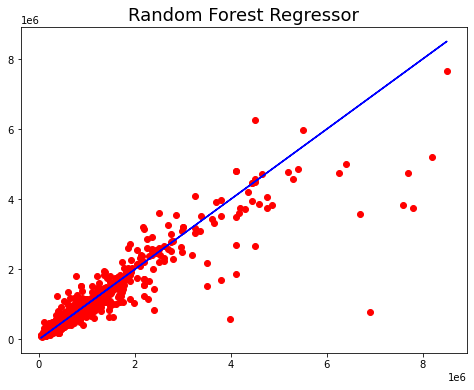

In [345]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_predrf,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Random Forest Regressor",fontsize=18)
plt.show()

In [390]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT.score(x_train,y_train)
y_predDT = DT.predict(x_test)
DT_MAE = round(MAE(y_test, y_predDT),2)
DT_MSE = round(MSE(y_test, y_predDT),2)
DT_R_2 = round(r2_score(y_test,y_predDT),4)
DT_CS  = round(cross_val_score(DT,x_t,y,cv=3).mean(),4)

print(f"RFR Mean Absolute Error: {DT_MAE}\n")
print(f"RFR Mean Squared Error: {DT_MSE}\n")
print(f"RFR R^2 Score: {DT_R_2*100}\n")
print(f"RFR Cross val Score: {DT_CS}\n")

RFR Mean Absolute Error: 112571.96

RFR Mean Squared Error: 135257432452.44

RFR R^2 Score: 79.35

RFR Cross val Score: 0.7285



In [364]:

models= [AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(),]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(r2_score(y_test, predm)) 
    print(cross_val_score(m,x_t,y,cv=3).mean(),4)
    print("****************************************************************")
    print("\n")

[AdaBoostRegressor()]:
0.26467216989661924
0.3151844308675303 4
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor()]:
0.8808023594767749
0.8325008827604372 4
****************************************************************


[AdaBoostRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]:
0.803814809815924
0.7911069139244066 4
****************************************************************




In [406]:
model = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=10,
    nthread=4)

model.fit(x_train, y_train, 
          eval_set=[(x_train, y_train), (x_test, y_test)], eval_metric='mae')

[0]	validation_0-mae:639819.43750	validation_1-mae:634902.93750
[1]	validation_0-mae:576645.18750	validation_1-mae:571626.31250
[2]	validation_0-mae:520078.96875	validation_1-mae:515512.18750
[3]	validation_0-mae:470516.65625	validation_1-mae:466483.87500
[4]	validation_0-mae:427147.90625	validation_1-mae:423351.21875
[5]	validation_0-mae:389299.65625	validation_1-mae:385814.46875
[6]	validation_0-mae:356323.50000	validation_1-mae:353510.96875
[7]	validation_0-mae:327723.40625	validation_1-mae:325911.68750
[8]	validation_0-mae:303979.75000	validation_1-mae:302645.15625
[9]	validation_0-mae:284340.87500	validation_1-mae:283085.03125
[10]	validation_0-mae:267300.78125	validation_1-mae:265410.71875
[11]	validation_0-mae:254201.23438	validation_1-mae:251811.20312
[12]	validation_0-mae:242042.98438	validation_1-mae:240430.32812
[13]	validation_0-mae:231468.67188	validation_1-mae:229926.96875
[14]	validation_0-mae:223152.70312	validation_1-mae:221789.04688
[15]	validation_0-mae:214696.45312	

[125]	validation_0-mae:117857.79688	validation_1-mae:136025.75000
[126]	validation_0-mae:117251.03906	validation_1-mae:135524.85938
[127]	validation_0-mae:116715.87500	validation_1-mae:134983.70312
[128]	validation_0-mae:116380.57812	validation_1-mae:134736.09375
[129]	validation_0-mae:116097.27344	validation_1-mae:134455.45312
[130]	validation_0-mae:115764.83594	validation_1-mae:134085.43750
[131]	validation_0-mae:114947.28125	validation_1-mae:133339.67188
[132]	validation_0-mae:114723.58594	validation_1-mae:133121.73438
[133]	validation_0-mae:114551.17969	validation_1-mae:133007.42188
[134]	validation_0-mae:113914.00000	validation_1-mae:132498.17188
[135]	validation_0-mae:113413.19531	validation_1-mae:132184.75000
[136]	validation_0-mae:113254.79688	validation_1-mae:132168.46875
[137]	validation_0-mae:112943.24219	validation_1-mae:131926.43750
[138]	validation_0-mae:112822.53125	validation_1-mae:131703.20312
[139]	validation_0-mae:112234.60938	validation_1-mae:130994.19531
[140]	vali

[250]	validation_0-mae:88795.30469	validation_1-mae:111854.96875
[251]	validation_0-mae:88721.69531	validation_1-mae:111863.28906
[252]	validation_0-mae:88547.52344	validation_1-mae:111731.76562
[253]	validation_0-mae:88408.83594	validation_1-mae:111622.11719
[254]	validation_0-mae:88198.19531	validation_1-mae:111469.50000
[255]	validation_0-mae:88072.54688	validation_1-mae:111345.78125
[256]	validation_0-mae:87792.13281	validation_1-mae:111138.51562
[257]	validation_0-mae:87545.94531	validation_1-mae:110971.47656
[258]	validation_0-mae:87407.40625	validation_1-mae:110867.75000
[259]	validation_0-mae:87264.67188	validation_1-mae:110705.89844
[260]	validation_0-mae:87132.42969	validation_1-mae:110501.49219
[261]	validation_0-mae:86946.22656	validation_1-mae:110346.25000
[262]	validation_0-mae:86773.30469	validation_1-mae:110132.20312
[263]	validation_0-mae:86694.82031	validation_1-mae:110087.03125
[264]	validation_0-mae:86422.49219	validation_1-mae:109832.74219
[265]	validation_0-mae:86

[376]	validation_0-mae:72240.97656	validation_1-mae:98680.97656
[377]	validation_0-mae:72203.49219	validation_1-mae:98672.84375
[378]	validation_0-mae:72135.75000	validation_1-mae:98625.38281
[379]	validation_0-mae:72100.75781	validation_1-mae:98594.70312
[380]	validation_0-mae:71887.07812	validation_1-mae:98582.28906
[381]	validation_0-mae:71857.07031	validation_1-mae:98564.00781
[382]	validation_0-mae:71822.96094	validation_1-mae:98520.53125
[383]	validation_0-mae:71655.60938	validation_1-mae:98460.74219
[384]	validation_0-mae:71509.61719	validation_1-mae:98372.08594
[385]	validation_0-mae:71373.00781	validation_1-mae:98248.44531
[386]	validation_0-mae:71271.92188	validation_1-mae:98198.02344
[387]	validation_0-mae:71215.08594	validation_1-mae:98178.97656
[388]	validation_0-mae:71156.85156	validation_1-mae:98129.47656
[389]	validation_0-mae:71121.54688	validation_1-mae:98123.83594
[390]	validation_0-mae:71005.29688	validation_1-mae:98007.25781
[391]	validation_0-mae:70952.91406	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=0.9, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [407]:
model.fit(x_train,y_train)
model.score(x_train,y_train)
y_predxg = model.predict(x_test)

xgs = r2_score(y_test,y_predxg)
print("r2 score is :",xgs*100)

#xgscore=cross_val_score(model,x_t,y,cv=3)
#xgc=xgscore.mean()
#print("Cross value Score:",xgc)

r2 score is : 93.37515908955586


In [399]:
xg_MAE = round(MAE(y_test, y_predxg),2)
xg_MSE = round(MSE(y_test, y_predxg),2)
xg_R_2 = round(r2_score(y_test,y_predxg),4)
xg_CS  = round(cross_val_score(model,x_t,y,cv=3).mean(),4)

print(f"XGB Mean Absolute Error: {xg_MAE}\n")
print(f"XGB Mean Squared Error: {xg_MSE}\n")
print(f"XGB R^2 Score: {xg_R_2*100}\n")
print(f"XGB Cross val Score: {xg_CS}\n")

XGB Mean Absolute Error: 91375.47

XGB Mean Squared Error: 43385593085.73

XGB R^2 Score: 93.38

XGB Cross val Score: 0.8861



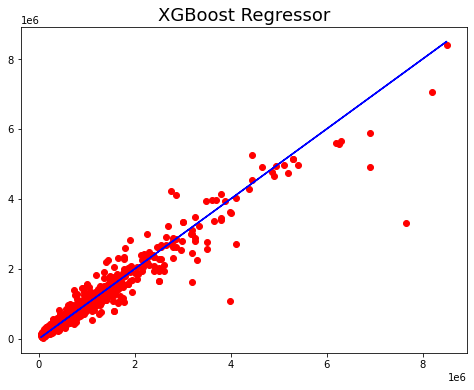

In [400]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_predxg,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("XGBoost Regressor",fontsize=18)
plt.show()

In [401]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":y_predxg})
df_pred

Original      Predicted
2809  400000.0  402221.593750
3163  750000.0  720294.062500
7607  719000.0  697231.125000
809   235000.0  212868.750000
363   285000.0  215868.890625
...        ...            ...
960   570000.0  586461.500000
720   490000.0  469401.281250
1462  325000.0  369970.250000
6195  180000.0  226505.734375
6902  865000.0  884453.812500

[1818 rows x 2 columns]

In [408]:
import joblib
joblib.dump(model,"CarPredictionsXGB.pkl")

['CarPredictionsXGB.pkl']

# Final Model We have been Able to Achieve a R2 Score of 93.37% using XG Boost Regressor 